In [1]:
#import libraries
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt
import random
from scipy.stats import chisquare

In [2]:
def benford_x_digit(rawdata,digit):
    data_nonzero=filter(lambda n: n !=0. , rawdata)
    data=list(data_nonzero)
    BFD= [math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]
    data_count={}
    for i in range(10**(digit-1),10**digit):
        data_count[i]=0      
    data_xdigits=[int(str(abs(x*1000))[0:digit]) for x in data]
    for i in range(len(data_xdigits)):
            data_count[data_xdigits[i]]=data_count[data_xdigits[i]]+1
    list_tuples=sorted(data_count.items())
    data_count=[i[1] for i in list_tuples]
    total_count=sum(data_count)
    expected_count=[p * total_count for p in BFD]
    return  data_count, expected_count

In [3]:
def plot_benford(data,digit):   
    data_count, expected_count =benford_x_digit(data,digit)
    y1 = expected_count
    y2 = data_count
    x= np.arange(10**(digit-1),10**digit)
    bins = np.linspace(1, 10)
    width=.35
    plt.bar(x, y1, width, label="Benford")
    plt.bar(x+width, y2, width, label="Actual")
    plt.xticks(x+width/2 , x)
    plt.legend(loc='upper right')
    plt.show()

In [4]:
#data=[4,1,2,3,4,10,2,4,334,667,878,989,7,12,22,100,132,144,167,1000,190,58,299,4,30,500,0,72,-1,0.02,999999,100,111,34,111,12,3,5,7,6,8,9,6,23,3,6,214,38,1,223,2,11,223,4,1,2,33,4,55,]
df= pd.read_excel("./test_data/data.xlsx")
df

,Unnamed: 0,field1,field2,field3
0,0,-54,4888,-5158
1,1,6,-2316,865
2,2,-16,-84,20
3,3,82,-12138,-11577
4,4,28,-144,-77
...,...,...,...,...
99995,99995,44,-3521,-49
99996,99996,-3,-21,56
99997,99997,58,-2291,2189
99998,99998,73,10228,-10975


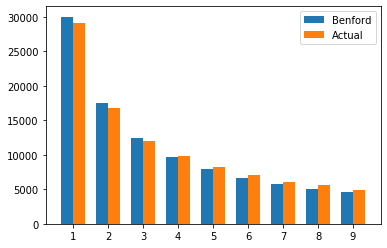

In [5]:
digit=1
data=df["field3"].tolist()
plot_benford(data,digit)

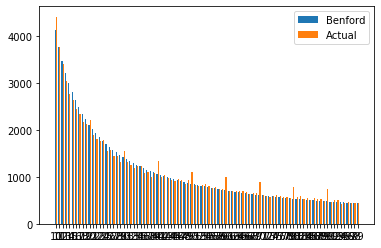

In [6]:
digit=2
data=df["field3"].tolist()
plot_benford(data,digit)

In [7]:
anomalies=[]
digit=2
data_count, expected_count =benford_x_digit(data,digit)
for i in range(len(data_count)):
    delta = abs(expected_count[i]-data_count[i])
    delta_sqr=(expected_count[i]-data_count[i])**2
    delta_perc=delta/expected_count[i]
    anomalies.append([range(10**(digit-1),10**digit)[i],data_count[i],expected_count[i],delta,delta_sqr, delta_perc])
anomalies[0]

[10,
 4408,
 4128.630595736844,
 279.36940426315596,
 78047.26403835067,
 0.06766636001574668]

In [8]:
 [i for i in anomalies if i[5]>.2]

[[40,
  1327,
  1069.6305057716208,
  257.36949422837915,
  66239.05655937169,
  0.24061532729259189],
 [50,
  1103,
  857.8069320489441,
  245.19306795105592,
  60119.640571251126,
  0.2858371258033456],
 [60,
  997,
  716.0135664631669,
  280.98643353683315,
  78953.37583174914,
  0.3924317173552991],
 [70,
  891,
  614.447671144705,
  276.55232885529495,
  76481.1905952872,
  0.45008280093255604],
 [80,
  782,
  538.116665475731,
  243.883334524269,
  59479.0808586765,
  0.45321646804724003],
 [90,
  735,
  478.65497527625627,
  256.34502472374373,
  65712.77170061678,
  0.5355528260743428]]

This does the Chi Square test, but tends to be problematic with high numbers (DOFs)

In [12]:
def chisquare_test(data_count,digit):
    total_count=sum(data_count)  
    BFD= [math.log10(1.0+1.0/n) for n in range (10**(digit-1),10**digit)]
    exp_count=[int(p * total_count) for p in BFD]      
    chi_sqr, pvalue = chisquare(data_count, f_exp=exp_count) 
    return chi_sqr , pvalue
digit=2
data_count, expected_count =benford_x_digit(data,digit)
total_count=sum(data_count)  
data_count
chi_sqr, pvalue = chisquare_test(data_count,digit)
print("CHI square statistic:",chi_sqr)
print("p value",pvalue)


CHI square statistic: 898.2339796777127
p value 5.903330140358592e-134
